In [2]:
import pandas as pd
import numpy as np
from datetime import date
from dateutil import relativedelta as rd

from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

import seaborn as sns
sns.set_style("whitegrid")

from app import data_loader as dl
from app import models, evaluate, metrics, visualise

In [3]:
period_start = date(1958, 3, 1)
period_end = date(1959, 2, 1)
data = (
    dl.load_data()
)

In [4]:
naive_df = evaluate.generate_evaluation_set(data, period_start, period_end, 12, models.Naive())
forecast = naive_df[naive_df.forecast_start == period_start]

In [5]:
evaluate.build_period_score(forecast)

,forecast_start,y_pred,y_true,mape,mae,rmse,bias
0,1958-03-01,3816,4616,17.331023,800.0,800.0,-1


In [6]:
naive_horizon_score = evaluate.build_horizon_score(naive_df)
naive_horizon_score

,horizon,bias,mae,mape,observations,rmse
0,1.0,-0.166667,39.833333,10.337033,12.0,47.506140
1,2.0,-0.272727,65.454545,16.657421,11.0,80.047713
2,3.0,-0.200000,86.100000,22.328246,10.0,104.828908
3,4.0,0.111111,103.333333,26.778746,9.0,118.155265
4,5.0,0.250000,107.750000,27.869123,8.0,121.315704
5,6.0,0.142857,97.857143,25.816630,7.0,115.261814
6,7.0,0.666667,62.833333,17.749428,6.0,78.899725
7,8.0,0.600000,40.000000,11.897043,5.0,51.310818
8,9.0,0.500000,16.500000,4.868182,4.0,17.846568
9,10.0,0.333333,9.000000,2.649308,3.0,11.561430


In [7]:
forecast_horizon_score = evaluate.build_horizon_score(forecast)
forecast_horizon_score

,horizon,bias,mae,mape,observations,rmse
0,1.0,-1.0,44.0,12.154696,1.0,44.0
1,2.0,-1.0,30.0,8.620690,1.0,30.0
2,3.0,-1.0,45.0,12.396694,1.0,45.0
3,4.0,-1.0,117.0,26.896552,1.0,117.0
4,5.0,-1.0,173.0,35.234216,1.0,173.0
5,6.0,-1.0,187.0,37.029703,1.0,187.0
6,7.0,-1.0,86.0,21.287129,1.0,86.0
7,8.0,-1.0,41.0,11.420613,1.0,41.0
8,9.0,1.0,8.0,2.580645,1.0,8.0
9,10.0,-1.0,19.0,5.637982,1.0,19.0


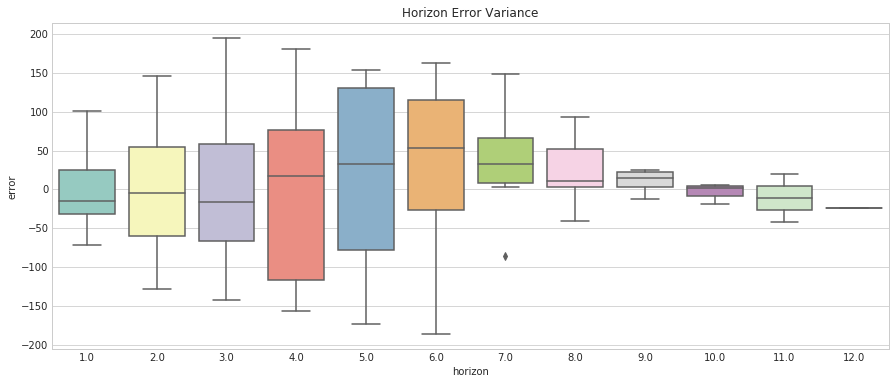

In [8]:
visualise.plot_horizon_variance(naive_df)
plt.title('Horizon Error Variance')
plt.show();

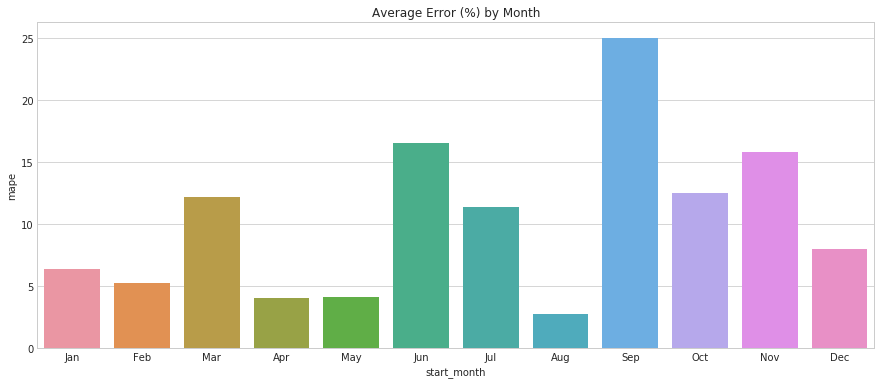

In [9]:
visualise.plot_month_score(naive_df, 1)
plt.title('Average Error (%) by Month')
plt.show();

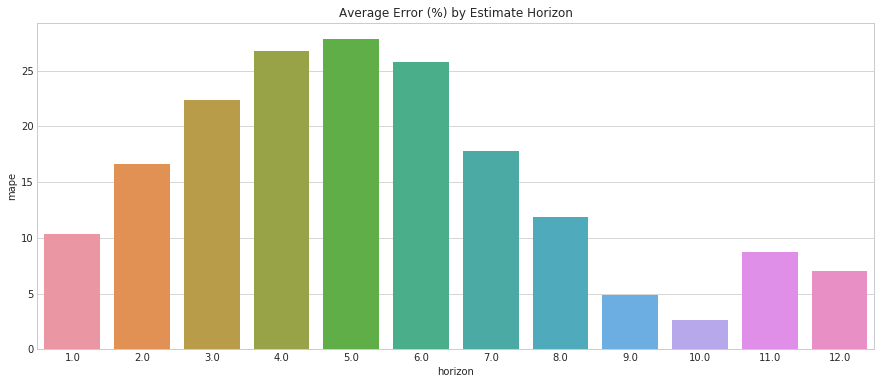

In [10]:
visualise.plot_horizon_score(naive_horizon_score)
plt.title('Average Error (%) by Estimate Horizon')
plt.show();

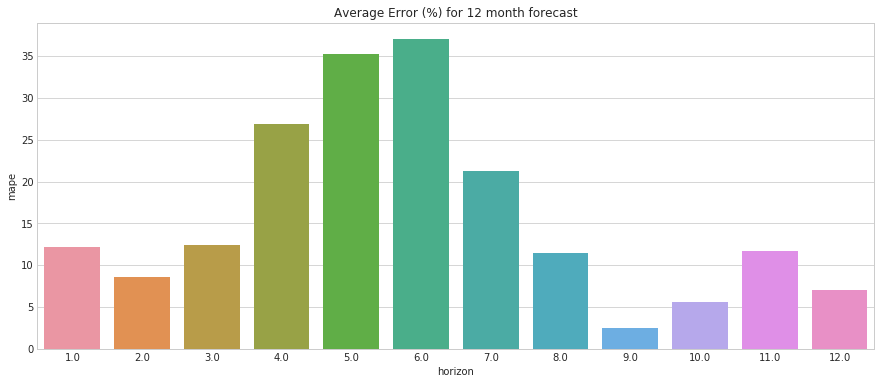

In [11]:
visualise.plot_horizon_score(forecast_horizon_score)
plt.title('Average Error (%) for 12 month forecast')
plt.show();

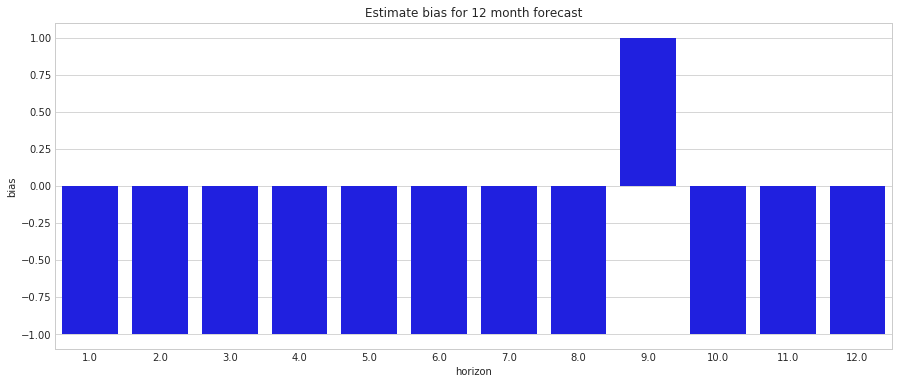

In [12]:
visualise.plot_horizon_bias(forecast)
plt.title('Estimate bias for 12 month forecast')
plt.show();